## Описание алгоритма стохастического градиентного спуска (SGD) с L1-регуляризацией

Данный алгоритм используется для аппроксимации функции $f(x)$ на заданном интервале с помощью полиномиальной модели степени $N-1$. Обучение модели производится с помощью алгоритма стохастического градиентного спуска с использованием мини-батчей и добавлением L1-регуляризации.

**Цель:** Найти вектор параметров $w = [w_0, w_1, \dots, w_{N-1}]^T$, минимизирующий функцию потерь, включающую усеченный эмпирический риск и L1-регуляризатор. L1-регуляризация способствует получению разреженных моделей (с весами, равными нулю).

**Функция для аппроксимации:**

$$f(x) = -0.5 \cdot x^2 + 0.1 \cdot x^3 + \cos(3x) + 7$$

**Модель для аппроксимации:**

$$a(x) = w_0 + \sum_{i=1}^{N-1} w_i \cdot x^i$$

при $N=5$.

**Усеченный эмпирический риск:**

В SGD с мини-батчами на каждой итерации используется усеченный эмпирический риск, вычисленный по случайному мини-батчу данных:

$$Q_k(w) = \frac{1}{K} \sum_{i=k}^{k+K-1} (a(x_i, w) - y_i)^2 = \frac{1}{K} \sum_{i=k}^{k+K-1} (w^T \cdot x_i - y_i)^2$$

где:
- $k$ - случайно выбранный начальный индекс мини-батча.
- $K$ (`batch_size` в коде) - размер мини-батча.
- $a(x_i, w)$ - значение модели в точке $x_i$ с текущими параметрами $w$.
- $y_i$ - истинное значение функции в точке $x_i$.

**Алгоритм стохастического градиентного спуска с L1-регуляризацией:**

Правило обновления вектора параметров $w$ включает градиент усеченного эмпирического риска и градиент члена L1-регуляризации:

$$w_n = w_{n-1} - \eta \cdot \left(\frac{\partial Q_k(w)}{\partial w} + \lambda \cdot \text{sign}(\tilde{w})\right)$$

где:
- $w_n$ - вектор параметров на текущей итерации.
- $w_{n-1}$ - вектор параметров на предыдущей итерации.
- $\eta$ - шаг обучения (learning rate).
- $\frac{\partial Q_k(w)}{\partial w}$ - градиент усеченного эмпирического риска по вектору параметров $w$ для текущего мини-батча.
- $\lambda$ - коэффициент L1-регуляризации.
- $\tilde{w} = [0, w_1, \dots, w_{N-1}]^T$ - вектор параметров, где первый параметр $w_0$ не регуляризуется. Функция $\text{sign}(\cdot)$ применяется поэлементно.

**Градиент усеченного эмпирического риска:**

Производная усеченного показателя качества по вектору параметров $w$ для мини-батча:

$$\frac{\partial Q_k(w)}{\partial w} = \frac{2}{K} \sum_{i=k}^{k+K-1} (w^T \cdot x_i - y_i) \cdot x_i^T$$

где $x_i = [1, x, x^2, \dots, x^{N-1}]^T$ - вектор признаков для i-го образа в мини-батче.

**Матрица признаков X:**

Матрица признаков $X$ для всей выборки формируется таким образом, что каждая строка соответствует одной точке данных $x_i$ из интервала $[-4, 6]$. Столбцы матрицы содержат значения признаков для каждой точки, соответствующих степеням $x$ от 0 до $N-1$:

$$X = \begin{pmatrix}
1 & x_1 & x_1^2 & \cdots & x_1^{N-1} \\
1 & x_2 & x_2^2 & \cdots & x_2^{N-1} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_l & x_l^2 & \cdots & x_l^{N-1}
\end{pmatrix}$$


где $l$ - общее количество точек в выборке. Для $N=5$, матрица $X$ будет иметь 5 столбцов (от $x^0$ до $x^4$).

**Скользящее среднее ошибки:**

На каждой итерации алгоритма SGD пересчитывается значение экспоненциального скользящего среднего ошибки $Qe$ по формуле:

$$Qe = \lambda_{lm} \cdot Q_k(w) + (1 - \lambda_{lm}) \cdot Qe$$

где:
- $Qe$ - текущее значение скользящего среднего ошибки.
- $Q_k(w)$ - ошибка на текущем мини-батче.
- $\lambda_{lm}$ (`lm` в коде) - параметр сглаживания для скользящего среднего.

**Реализация в коде (общие моменты):**

В коде для реализации этого алгоритма необходимо будет:

1.  Определить целевую функцию $f(x)$ и подготовить данные (пары $x_i, y_i$) на заданном интервале.
2.  Создать полную матрицу признаков $X$ для всех отсчетов.
3.  Инициализировать параметры $w$, шаг обучения $\eta$, коэффициент L1-регуляризации $\lambda$ (`lm_l1`), размер мини-батча $K$ (`batch_size`), число итераций $N$, и параметр сглаживания $\lambda_{lm}$ (`lm`).
4.  В цикле итераций:
    - Случайно выбрать начальный индекс `k` для мини-батча (`k = np.random.randint(0, sz-batch_size-1)`), где `sz` - размер выборки.
    - Извлечь мини-батчи признаков (`X_batch`) и истинных значений (`y_batch`) из полных массивов $X$ и $y$.
    - Вычислить градиент усеченного эмпирического риска по мини-батчу (`gradient_batch`).
    - Сформировать вектор $\tilde{w}$ для L1-регуляризации (обнулив первый элемент $w_0$).
    - Обновить вектор параметров $w$ по формуле SGD с L1-регуляризацией: $w = w - \eta \cdot (gradient\_batch + \lambda \cdot \text{sign}(\tilde{w}))$.
    - Вычислить ошибку на текущем мини-батче (`Qk`) и обновить скользящее среднее ошибки (`Qe`).
    - (Опционально) Включить проверки на NaN или Inf в градиенте или весах для отладки численной устойчивости.
5.  После завершения итераций:
    - Вычислить итоговое значение среднего эмпирического риска для всей выборки: $Q(a, X) = \frac{1}{n} \cdot \sum_{i=1}^{n} (a(x_i, w) - y_i)^2$.
    - Вывести итоговые параметры $w$, итоговую среднеквадратичную ошибку $Q$, и последнее значение скользящего среднего ошибки $Qe$.
    - (Опционально) Построить финальный график аппроксимации.

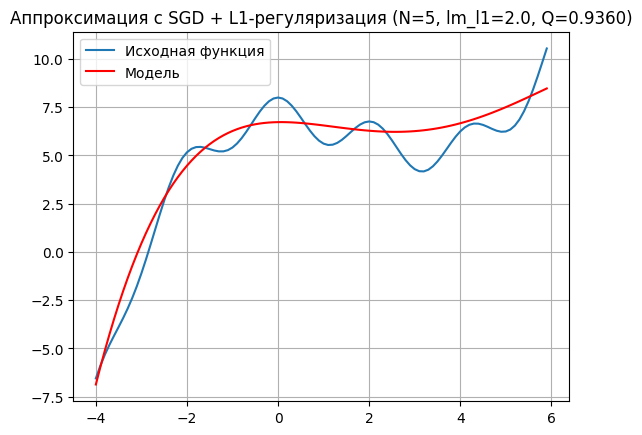

Итоговые веса (w):
[[ 6.72521145]
 [ 0.04001613]
 [-0.30835061]
 [ 0.10324907]
 [-0.00739641]]

Итоговая среднеквадратичная ошибка (Q): 0.9360

Последнее значение скользящего среднего ошибки (Qe): 5.1564


In [15]:
import numpy as np
import matplotlib.pyplot as plt
# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return -0.5 * x ** 2 + 0.1 * x ** 3 + np.cos(3 * x) + 7


# модель
def model(w, x):
    xv = np.array([x ** n for n in range(len(w))])
    return w.T @ xv


# функция потерь
def loss(w, x, y):
    return (model(w, x) - y) ** 2


# производная функции потерь
def dL(w, x, y):
    xv = np.array([x ** n for n in range(len(w))])
    return 2 * (model(w, x) - y) * xv


coord_x = np.arange(-4.0, 6.0, 0.1)
coord_y = func(coord_x)

N = 5 # сложность модели (полином степени N-1)
lm_l1 = 2.0 # коэффициент лямбда для L1-регуляризатора
sz = len(coord_x)       # количество значений функций (точек)
eta = np.array([0.1, 0.01, 0.001, 0.0001, 0.000002]).reshape(-1,1) # шаг обучения для каждого параметра w0, w1, w2, w3, w4
w = np.zeros(N).reshape(-1,1) # начальные нулевые значения параметров модели
n_iter = 500 # число итераций алгоритма SGD
lm = 0.02 # значение параметра лямбда для вычисления скользящего экспоненциального среднего
batch_size = 20 # размер мини-батча (величина K = 20)
X = np.column_stack([
    np.ones_like(coord_x),
    coord_x,
    coord_x**2,
    coord_x**3,
    coord_x**4
    ])
Y = coord_y.reshape(-1,1)

Qe = np.mean((X@w - Y)**2)# начальное значение среднего эмпирического риска
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел

# здесь продолжайте программу


for i in range(n_iter): # Добавлена переменная итерации i
  k = np.random.randint(0, sz - batch_size - 1) # Случайный начальный индекс
  X_batch = X[k : k + batch_size] # (20,5)
  Y_batch = Y[k : k + batch_size] # (20,1)
  Qk = np.mean((X_batch@w - Y_batch)**2)
  Qe = lm * Qk + (1 - lm) * Qe
  w_ = w.copy()
  w_[0] = 0
  gradient = 2 / batch_size * X_batch.T @ (X_batch@w - Y_batch)
  w = w - eta * (gradient + lm_l1 * np.sign(w_))

Q = np.mean((X@w - Y)**2)
# Код для отображения финального графика
fig, ax = plt.subplots()
ax.grid(True)
ax.plot(coord_x, coord_y, label='Исходная функция')
ax.plot(coord_x, X @ w, c="red", label='Модель')
ax.legend()
plt.title(f'Аппроксимация с SGD + L1-регуляризация (N={N}, lm_l1={lm_l1}, Q={Q:.4f})')
plt.show()

print(f"Итоговые веса (w):")
print(w)
print(f"\nИтоговая среднеквадратичная ошибка (Q): {Q:.4f}")
print(f"\nПоследнее значение скользящего среднего ошибки (Qe): {Qe:.4f}")

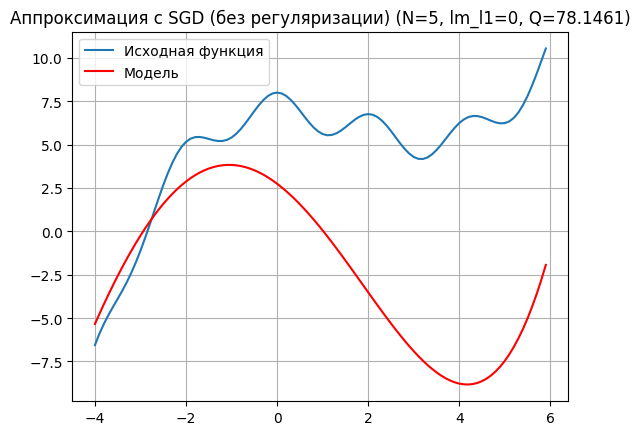

Итоговые веса (w):
[[ 2.7460891 ]
 [-1.98549308]
 [-0.81767694]
 [ 0.09724483]
 [ 0.01281384]]

Итоговая среднеквадратичная ошибка (Q): 78.1461

Последнее значение скользящего среднего ошибки (Qe): 517.4774


In [17]:
import numpy as np
import matplotlib.pyplot as plt
# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return -0.5 * x ** 2 + 0.1 * x ** 3 + np.cos(3 * x) + 7


# модель
def model(w, x):
    xv = np.array([x ** n for n in range(len(w))])
    return w.T @ xv


# функция потерь
def loss(w, x, y):
    return (model(w, x) - y) ** 2


# производная функции потерь
def dL(w, x, y):
    xv = np.array([x ** n for n in range(len(w))])
    return 2 * (model(w, x) - y) * xv


coord_x = np.arange(-4.0, 6.0, 0.1)
coord_y = func(coord_x)

N = 5 # сложность модели (полином степени N-1)
lm_l1 = 0 # коэффициент лямбда для L1-регуляризатора
sz = len(coord_x)       # количество значений функций (точек)
eta = np.array([0.1, 0.01, 0.001, 0.0001, 0.000002]).reshape(-1,1) # шаг обучения для каждого параметра w0, w1, w2, w3, w4
w = np.zeros(N).reshape(-1,1) # начальные нулевые значения параметров модели
n_iter = 500 # число итераций алгоритма SGD
lm = 0.02 # значение параметра лямбда для вычисления скользящего экспоненциального среднего
batch_size = 20 # размер мини-батча (величина K = 20)
X = np.column_stack([
    np.ones_like(coord_x),
    coord_x,
    coord_x**2,
    coord_x**3,
    coord_x**4
    ])
Y = coord_y.reshape(-1,1)

Qe = np.mean((X@w - Y)**2)# начальное значение среднего эмпирического риска
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел

# здесь продолжайте программу


for i in range(n_iter): # Добавлена переменная итерации i
  k = np.random.randint(0, sz - batch_size - 1) # Случайный начальный индекс
  X_batch = X[k : k + batch_size] # (20,5)
  Y_batch = Y[k : k + batch_size] # (20,1)
  Qk = np.mean((X_batch@w - Y_batch)**2)
  Qe = lm * Qk + (1 - lm) * Qe
  w_ = w.copy()
  w_[0] = 0
  gradient = 2 / batch_size * X_batch.T @ (X_batch@w - Y_batch)
  w = w - eta * (gradient + lm_l1 * np.sign(w_))

Q = np.mean((X@w - Y)**2)
# Код для отображения финального графика
fig, ax = plt.subplots()
ax.grid(True)
ax.plot(coord_x, coord_y, label='Исходная функция')
ax.plot(coord_x, X @ w, c="red", label='Модель')
ax.legend()
plt.title(f'Аппроксимация с SGD (без регуляризации) (N={N}, lm_l1={lm_l1}, Q={Q:.4f})')
plt.show()

print(f"Итоговые веса (w):")
print(w)
print(f"\nИтоговая среднеквадратичная ошибка (Q): {Q:.4f}")
print(f"\nПоследнее значение скользящего среднего ошибки (Qe): {Qe:.4f}")

Доля ошибок: 0.09
Весовые коэффициенты w:
[-3.67012934  0.12260854  0.66859677  0.05038683  0.39510265]


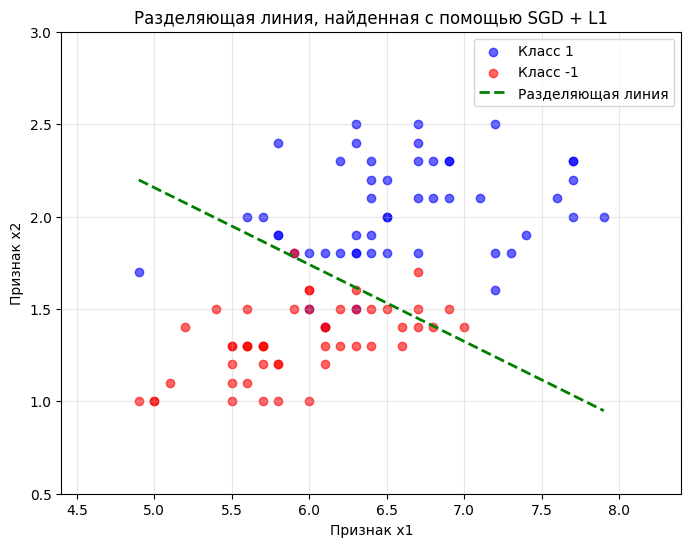

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# логарифмическая функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return np.log2(1 + np.exp(-M))

# производная логарифмической функции потерь по вектору w
def df(w, x, y):
    M = np.dot(w, x) * y
    return -(np.exp(-M) * x.T * y) / ((1 + np.exp(-M)) * np.log(2))

data_x = [(5.8, 1.2), (5.6, 1.5), (6.5, 1.5), (6.1, 1.3), (6.4, 1.3), (7.7, 2.0), (6.0, 1.8), (5.6, 1.3), (6.0, 1.6), (5.8, 1.9), (5.7, 2.0), (6.3, 1.5), (6.2, 1.8), (7.7, 2.3), (5.8, 1.2), (6.3, 1.8), (6.0, 1.0), (6.2, 1.3), (5.7, 1.3), (6.3, 1.9), (6.7, 2.5), (5.5, 1.2), (4.9, 1.0), (6.1, 1.4), (6.0, 1.6), (7.2, 2.5), (7.3, 1.8), (6.6, 1.4), (5.6, 2.0), (5.5, 1.0), (6.4, 2.2), (5.6, 1.3), (6.6, 1.3), (6.9, 2.1), (6.8, 2.1), (5.7, 1.3), (7.0, 1.4), (6.1, 1.4), (6.1, 1.8), (6.7, 1.7), (6.0, 1.5), (6.5, 1.8), (6.4, 1.5), (6.9, 1.5), (5.6, 1.3), (6.7, 1.4), (5.8, 1.9), (6.3, 1.3), (6.7, 2.1), (6.2, 2.3), (6.3, 2.4), (6.7, 1.8), (6.4, 2.3), (6.2, 1.5), (6.1, 1.4), (7.1, 2.1), (5.7, 1.0), (6.8, 1.4), (6.8, 2.3), (5.1, 1.1), (4.9, 1.7), (5.9, 1.8), (7.4, 1.9), (6.5, 2.0), (6.7, 1.5), (6.5, 2.0), (5.8, 1.0), (6.4, 2.1), (7.6, 2.1), (5.8, 2.4), (7.7, 2.2), (6.3, 1.5), (5.0, 1.0), (6.3, 1.6), (7.7, 2.3), (6.4, 1.9), (6.5, 2.2), (5.7, 1.2), (6.9, 2.3), (5.7, 1.3), (6.1, 1.2), (5.4, 1.5), (5.2, 1.4), (6.7, 2.3), (7.9, 2.0), (5.6, 1.1), (7.2, 1.8), (5.5, 1.3), (7.2, 1.6), (6.3, 2.5), (6.3, 1.8), (6.7, 2.4), (5.0, 1.0), (6.4, 1.8), (6.9, 2.3), (5.5, 1.3), (5.5, 1.1), (5.9, 1.5), (6.0, 1.5), (5.9, 1.8)]
data_y = [-1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1]

x_train = np.array([[1, x[0], x[1], 0.8*x[0], (x[0]+x[1])/2] for x in data_x])
y_train = np.array(data_y)

n_train = len(x_train)  # размер обучающей выборки
w = np.zeros(len(x_train[0])).reshape(-1,1)  # начальные нулевые весовые коэффициенты
nt = np.array([0.5] + [0.01] * (len(w) - 1)).reshape(-1,1) # шаг обучения для каждого параметра w0, w1, w2, ...
lm = 0.01  # значение параметра лямбда для вычисления скользящего экспоненциального среднего
N = 500  # число итераций алгоритма SGD
batch_size = 10 # размер мини-батча (величина K = 10)
lm_l1 = 0.05 # параметр лямбда для L1-регуляризатора

Y = y_train.reshape(-1,1)
X = x_train
margin = X@w * Y
Qe = np.mean(np.log2(1 + np.exp(-margin))) #начальное значение среднего эмпирического риска

np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел

# SGD с L1-регуляризацией
for _ in range(N):
    k = np.random.randint(0, n_train - batch_size - 1)
    X_batch = X[k: k + batch_size]
    Y_batch = Y[k: k + batch_size]
    margin = X_batch@w * Y_batch
    Qk = np.mean(np.log2(1 + np.exp(-margin)))
    Qe = lm * Qk + (1 - lm) * Qe

    w_ = w.copy()
    w_[0] = 0

    gradient = X_batch.T @ -((np.exp(-(X_batch@w * Y_batch)) * Y_batch) / ((1 + np.exp(-(X_batch@w * Y_batch))) * np.log(2)))
    w = w - nt * ((gradient/batch_size) + lm_l1 * np.sign(w_))

margin = X@w * Y
Q = np.mean(margin < 0)
print(f"Доля ошибок: {Q}")
print(f"Весовые коэффициенты w:\n{w.flatten()}")

# Код для отображения финального графика (ИСПРАВЛЕННЫЙ)
plt.figure(figsize=(8, 6))

# Для построения разделяющей линии используем уравнение:
# w0 + w1*x1 + w2*x2 + w3*0.8*x1 + w4*(x1+x2)/2 = 0
# Упростим: w0 + w1*x1 + w2*x2 + 0.8*w3*x1 + w4*x1/2 + w4*x2/2 = 0
# w0 + x1*(w1 + 0.8*w3 + w4/2) + x2*(w2 + w4/2) = 0
# Отсюда: x2 = -(w0 + x1*(w1 + 0.8*w3 + w4/2)) / (w2 + w4/2)

line_x = np.linspace(min(x_train[:, 1]), max(x_train[:, 1]), 100)
# Пересчитываем эффективные коэффициенты
w_eff_0 = w[0, 0]  # bias
w_eff_1 = w[1, 0] + 0.8 * w[3, 0] + w[4, 0] / 2  # коэффициент для x1
w_eff_2 = w[2, 0] + w[4, 0] / 2  # коэффициент для x2

# Вычисляем x2 для каждого x1
line_y = -(w_eff_0 + w_eff_1 * line_x) / w_eff_2
# Разделяем точки по классам
x_0 = x_train[y_train == 1]  # формирование точек для класса 1
x_1 = x_train[y_train == -1]  # формирование точек для класса -1

plt.scatter(x_0[:, 1], x_0[:, 2], color='blue', label='Класс 1', alpha=0.6)
plt.scatter(x_1[:, 1], x_1[:, 2], color='red', label='Класс -1', alpha=0.6)
plt.plot(line_x, line_y, color='green', linestyle='--', linewidth=2, label='Разделяющая линия')
plt.xlabel('Признак x1')
plt.ylabel('Признак x2')
plt.title('Разделяющая линия, найденная с помощью SGD + L1')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(min(x_train[:, 1]) - 0.5, max(x_train[:, 1]) + 0.5)
plt.ylim(min(x_train[:, 2]) - 0.5, max(x_train[:, 2]) + 0.5)
plt.show()

